# What is black and white and red all over?


Does a player's skin tone affect the rate of red cards issued to players in the European football leagues?

## Summary

In my analysis of the data provided covering all European football leagues as a whole, I find a small amount of evidence for white players being issued red cards at a higer rate than black players. But accurate results require proper sampling of the data set in order to control for numerous factors. My analysis was not done blindly. That is, I obvserved the rate of red cards between cohorts of players for each particular cohort selection methodology as I changed my methodology. A proper study would first consider and settle upon an agreed sampling methodology before a measurement of the rate of red cards was made. 


### Methodology

To calculate this I create a group of "white" players and "black" players by using the "rater1" and "rater2" categories. I chose to only select the players that were on either ends of the rater spectrum in order to try to maximize the affect of skin tone influencing the rate of red cards. I also chose only player-referee dyads that had a **single game experience** in order to eliminate referee bias or histories with particular players. The idea behind this choice is that the single player-referee interactions represent a collection of independent experiments testing the rate of red cards versus skin tone. With single game interactions, there should be less historical bias toward players (except for bias due to a player's reputation.)

There are significantly more white players in the overall population than black players. From the single-game interaction set, I then collected a sample of white players such that roughly the same number of players from each country and position were equal between the two groups. 

### Single game dyad

Out of a sample of 6940 black players and 7029 white players, where I controlled for the European country in which they played and their position on the field (excluding Goalkeepers), 19 red cards were issued to white players and 32 red cards were issued to black players. The t-statistic for the mean rate of red cards between these two groups was -1.869, with a p-value of 0.062, just barely in support of the null hypthosis of an equal rate of red cards between the groups.

```
number of redCards black players: 32
number of redCards white players: 19
number of black players in sample: 6940
number of white players in sample: 7029


t: -1.8694173237059215
p-value: 0.06158568476049414
```

Due to the random selection of this method, this test should probably be run multiple times to measure a distribution of t-scores in order to get a clearer estimate.


### Five Game Dyad

Relaxing the maximimum number of games between player-referees to up to five games doubles the overall statistics and would probably still avoid strong biases and histories between players and referees. Allowing for the maximum number of player-referee interactions to five shows no significant increased rate of red cards being issued to either group of players. 

```
number of redCards black players: 107
number of redCards white players: 88
number of black players in sample: 12215
number of white players in sample: 12307


t: -1.4042259326234334
p-value: 0.1602642478947751
```

### Other Cards

Using the same sample as above (up to five games between player and referee), the number of cards issued were found to be

```
number of yellowCards black players: 2884
number of yellowCards white players: 3013
number of black players in sample: 12215
number of white players in sample: 12307


t: 1.3629607094252565
p-value: 0.17290740968002966


number of yellowReds black players: 103
number of yellowReds white players: 79
number of black players in sample: 12215
number of white players in sample: 12307


t: -1.8365039675739154
p-value: 0.0662952541874993
```

There doesn't appear to be a significant variation in the rate of yellow cards and yellowRed cards handed out to the two groups of players. 

### Caveats

One major caveat this analysis has not considered is total number of games played by an individual player or trying to control for the affect of particular referees in multiple games. That is, there were no limits set on the total number of games played by an individual player. If a particular player tends to pick up more cards just due to the nature of that player's game, that will skew the results. 


In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datafile = 'redcard.csv'

In [4]:
df = pd.read_csv(datafile)

In [5]:
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [6]:
df = df.dropna(subset=['rater1','rater2','position','leagueCountry'])

In [7]:
df.games.unique().max()

47

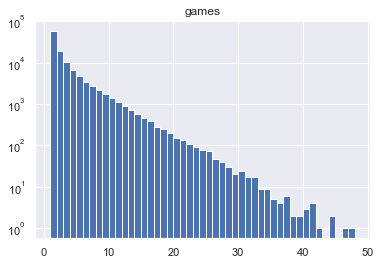

In [8]:
axs = df.hist(column='games', log=True, bins=range(1,49))

## One Game Dyads

From the plot above, we can control for referee biases or histories with particular players by selecting only player-referee interactions of just one game. 



In [9]:
data = df[df.games == 1].groupby(['rater1','rater2']).player.count()

In [10]:
data.unstack(level=0)

rater1,0.0,0.25,0.5,0.75,1.0
rater2,,,,,
0.00,16317.0,944.0,NaN,NaN,NaN
0.25,7611.0,17325.0,954.0,NaN,NaN
0.50,98.0,1622.0,4333.0,64.0,NaN
0.75,NaN,NaN,1085.0,3352.0,277.0
1.00,NaN,NaN,NaN,997.0,3546.0


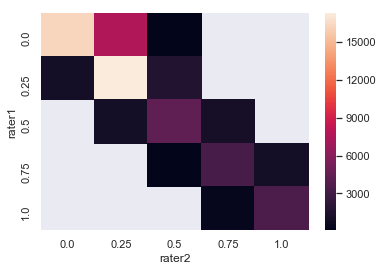

In [11]:
sns.heatmap(data.unstack())

In [16]:
# we could consider only games that are ties, but this might not be a good idea.

# data = df[(df.games == 1) & (df.ties==1)].groupby(['rater1','rater2']).player.count()

## Subselect

Out of this group, I'm going to choose the extremes and create two cohorts: players with both rater's giving them either a skin tone of 0 or skin tone of 1. 

There are significantly more white players than black players, so I should select all of the black players and then randomly select the white players such that various factors, such as leagueCountry and position can be controled. 

So, to "control" using a quota strategy, I randomly sample (without replacement) from the white player cohort such that the total number of white players from each factor does not exceed the total number of black players with that specific characteristic.

I'm going to ignore wins/losses/ties for now. Although I may consider using those to control as well because the nature of play varies when a team is winning or losing. On the other hand, issuing a red card would influence the game such that there is an increased likelihood of losing. So, due to this feedback loop, perhaps it's something to ignore. 

In [12]:
df['rater_tuple'] = df.apply(lambda x: (x.rater1,x.rater2), axis=1)

In [13]:
#expand the allowed values to identify the extreme groups

#I am defining the 'white'/'black' group to any player that recieves the following pair of ratings
whitetuples = [(0.0, 0.0), (0.25, 0.0), (0.0, 0.25), (0.25, 0.25)]
blacktuples = [(1.0, 1.0), (0.75, 1.0), (1.0, 0.75), (0.75, 0.75)]

#a more restrictive selection would be 
#whitetuples = [(0.0, 0.0)]
#blacktuples = [(1.0, 1.0)]

In [14]:
#Excluding the Goalkeeper since the keeper rarely recieves a red card

df_white = df[(df.games == 1) & (df.rater_tuple.isin(whitetuples)) & (df.position != 'Goalkeeper')]
df_black = df[(df.games == 1) & (df.rater_tuple.isin(blacktuples)) & (df.position != 'Goalkeeper')]

## Match Samples

There are significantly more white players than black players. So I am going to take a subsample of `white` players from the entire population. I am going to control for the `leagueCountry` and `position` as well. To do this, I count the number of `black` players by `leagueCountry` and `position`. I then randomly sample from the `white` players such that I do not exceed the counts of `leagueCountry` and `position` found in the `black` player population.

NB: I could consider controlling for other variables using this quota-like sampling method.

In [15]:
df_black.position.value_counts()

Center Forward          1910
Defensive Midfielder    1429
Center Back             1171
Left Fullback            691
Right Winger             691
Right Fullback           576
Left Winger              520
Left Midfielder          403
Attacking Midfielder     227
Center Midfielder        210
Right Midfielder         151
Name: position, dtype: int64

In [16]:
df_white.position.value_counts()

Center Back             7899
Center Forward          5186
Defensive Midfielder    4874
Attacking Midfielder    4417
Left Fullback           2986
Right Fullback          2709
Left Midfielder         2265
Center Midfielder       2058
Right Midfielder        1798
Left Winger             1368
Right Winger            1342
Name: position, dtype: int64

In [17]:
df_black.leagueCountry.value_counts().to_dict()

{'England': 3037, 'France': 2328, 'Germany': 1618, 'Spain': 996}

In [18]:
df_white.leagueCountry.value_counts().to_dict()

{'Germany': 15383, 'England': 9145, 'Spain': 8606, 'France': 3768}

In [19]:
def checkQuota(dframe, newrow, limits):
    ##there's probably a much faster way to do this
    for colsToLimit,currentLimits in limits.items():
        #example --> leagueCountry : {germany:val, england:val, ..}
        #these are the current value counts for each of the unique values in the limiting column
        #print(colsToLimit)
        #print(currentLimits)
        
        currentVals = dframe[colsToLimit].value_counts().to_dict()
        #currentVals = {germany:curval, england:curval, ...}
        
        #print(currentVals)
        newrowvalue = getattr(newrow, colsToLimit)
        #newrowvalue is "germany" for example
        
        #if we add this value to our current data frame, will we go over the limit?
        if currentVals.get(newrowvalue,0) + 1 > currentLimits[newrowvalue]:
            return False
    
    return True
        
def getControlLimits(df, colnames):
    quotaLimits = {}
    for col in colnames:
        quotaLimits[col]  = df[col].value_counts().to_dict()
    
    return quotaLimits

def createSample(samplefrom_df, matching_df, limitByColumns = ['leagueCountry', 'position'], subsample_df = None):

    #let's shuffle the order of the samplefrom_df
    samplefrom_df = samplefrom_df.sample(frac=1).reset_index(drop=True)

    quotaLimits = getControlLimits(matching_df, limitByColumns)
 
    if subsample_df is None:
        subsample_df = pd.DataFrame(columns = samplefrom_df.columns)
        playerShortList = []
        
    else:
        playerShortList = subsample_df['playerShort'].values
    
    for row in samplefrom_df.itertuples():
    
        #need to check if okay to add
        #row is okay to add IF the 
        if checkQuota(subsample_df, row, quotaLimits):
            if getattr(row, 'playerShort') not in playerShortList:
                #print('appending row...')
                subsample_df = subsample_df.append(pd.DataFrame([row[1:]],columns=samplefrom_df.columns.tolist()))

    return subsample_df

In [20]:
colsToControl = ['leagueCountry', 'position']


getControlLimits(df_black, colsToControl)

{'leagueCountry': {'England': 3037,
  'France': 2328,
  'Germany': 1618,
  'Spain': 996},
 'position': {'Center Forward': 1910,
  'Defensive Midfielder': 1429,
  'Center Back': 1171,
  'Left Fullback': 691,
  'Right Winger': 691,
  'Right Fullback': 576,
  'Left Winger': 520,
  'Left Midfielder': 403,
  'Attacking Midfielder': 227,
  'Center Midfielder': 210,
  'Right Midfielder': 151}}

In [33]:
different = True

df_black_sample = df_black
df_white_sample = None
count = 0
while different and count < 2:
    df_white_sample = createSample(df_white, df_black_sample, colsToControl)
    wh_control_list = getControlLimits(df_white_sample, colsToControl)

    df_black_sample = createSample(df_black, df_white_sample, colsToControl)
    bl_control_list = getControlLimits(df_black_sample, colsToControl)

    print("White Control List")
    print(wh_control_list)
    print("Black Control List")
    print(bl_control_list)

    # different = (wh_control_list != bl_control_list)
    # print("Different = {}".format(different))
    
    # only let this happen a maximum of 2 times. then we quit and take what we got
    count += 1
    

White Control List
{'leagueCountry': {'England': 3037, 'France': 1813, 'Germany': 1618, 'Spain': 996}, 'position': {'Center Forward': 1656, 'Defensive Midfielder': 1398, 'Center Back': 1171, 'Left Fullback': 691, 'Right Fullback': 576, 'Left Winger': 510, 'Right Winger': 471, 'Left Midfielder': 403, 'Attacking Midfielder': 227, 'Center Midfielder': 210, 'Right Midfielder': 151}}
Black Control List
{'leagueCountry': {'England': 2858, 'France': 1813, 'Germany': 1506, 'Spain': 942}, 'position': {'Center Forward': 1656, 'Defensive Midfielder': 1320, 'Center Back': 1089, 'Left Fullback': 658, 'Right Fullback': 518, 'Left Winger': 479, 'Right Winger': 471, 'Left Midfielder': 382, 'Center Midfielder': 210, 'Attacking Midfielder': 190, 'Right Midfielder': 146}}
White Control List
{'leagueCountry': {'England': 2858, 'France': 1723, 'Germany': 1506, 'Spain': 942}, 'position': {'Center Forward': 1586, 'Defensive Midfielder': 1320, 'Center Back': 1089, 'Left Fullback': 658, 'Right Fullback': 518, 

In [34]:
getControlLimits(df_white_sample, colsToControl)

{'leagueCountry': {'England': 2858,
  'France': 1723,
  'Germany': 1506,
  'Spain': 942},
 'position': {'Center Forward': 1586,
  'Defensive Midfielder': 1320,
  'Center Back': 1089,
  'Left Fullback': 658,
  'Right Fullback': 518,
  'Left Winger': 479,
  'Right Winger': 451,
  'Left Midfielder': 382,
  'Center Midfielder': 210,
  'Attacking Midfielder': 190,
  'Right Midfielder': 146}}

In [35]:
getControlLimits(df_black_sample, colsToControl)

{'leagueCountry': {'England': 2812,
  'France': 1723,
  'Germany': 1466,
  'Spain': 939},
 'position': {'Center Forward': 1586,
  'Defensive Midfielder': 1310,
  'Center Back': 1057,
  'Left Fullback': 635,
  'Right Fullback': 512,
  'Left Winger': 479,
  'Right Winger': 451,
  'Left Midfielder': 381,
  'Center Midfielder': 210,
  'Attacking Midfielder': 174,
  'Right Midfielder': 145}}

In [36]:
def printstats(dfw, dfb, cardType='redCards'):
    print('number of {} black players: {}'.format(cardType, dfb[cardType].sum()))
    print('number of {} white players: {}'.format(cardType, dfw[cardType].sum()))
    print('number of black players in sample: {}'.format(dfb[cardType].count()))
    print('number of white players in sample: {}'.format(dfw[cardType].count()))
    print('\n')
    tscore, pvalue = stats.ttest_ind(dfw[cardType].values,dfb[cardType].values)
    print('t: {}'.format(tscore))
    print('p-value: {}'.format(pvalue))
    
printstats(df_white_sample,df_black_sample)

number of redCards black players: 32
number of redCards white players: 19
number of black players in sample: 6940
number of white players in sample: 7029


t: -1.8694173237059215
p-value: 0.06158568476049414


In [37]:
printstats(df_white_sample,df_black_sample,'yellowCards')

number of yellowCards black players: 886
number of yellowCards white players: 871
number of black players in sample: 6940
number of white players in sample: 7029


t: -0.6683356606983769
p-value: 0.5039303993699006


In [38]:
printstats(df_white_sample,df_black_sample,'yellowReds')

number of yellowReds black players: 32
number of yellowReds white players: 35
number of black players in sample: 6940
number of white players in sample: 7029


t: 0.31509896002684235
p-value: 0.7526912253990913


### Checking other population selections

In [39]:
#Not controlling for league country or player position
printstats(df_white,df_black)

number of redCards black players: 34
number of redCards white players: 135
number of black players in sample: 7979
number of white players in sample: 36902


t: -0.797215571465104
p-value: 0.42533006167034904


In [40]:
printstats(df_white,df_black,'yellowCards')
printstats(df_white,df_black,'yellowReds')

number of yellowCards black players: 1004
number of yellowCards white players: 4776
number of black players in sample: 7979
number of white players in sample: 36902


t: 0.8687744628767861
p-value: 0.38497514945520817
number of yellowReds black players: 41
number of yellowReds white players: 148
number of black players in sample: 7979
number of white players in sample: 36902


t: -1.410723922575043
p-value: 0.15833296558930884


In [41]:
# I would conclude there is not a different in the rate of redCards issued to players depending on their skin tone. 

### Full Analysis

The following cells contain all of the functions and cells above incoprorated in a way to re-run the analysis with various choices. 



In [42]:
whitetuples = [(0.0, 0.0), (0.25, 0.0), (0.0, 0.25), (0.25, 0.25)]
blacktuples = [(1.0, 1.0), (0.75, 1.0), (1.0, 0.75), (0.75, 0.75)]
colsToControl = ['position','leagueCountry']

def runFull(datafile= 'redcard.csv', maxgames = 1):
    df = pd.read_csv(datafile)
    df = df.dropna(subset=['rater1','rater2','position','leagueCountry'])
    df['rater_tuple'] = df.apply(lambda x: (x.rater1,x.rater2), axis=1)
    
    df_white = df[(df.games <= maxgames) & (df.rater_tuple.isin(whitetuples)) & (df.position != 'Goalkeeper')]
    df_black = df[(df.games <= maxgames) & (df.rater_tuple.isin(blacktuples)) & (df.position != 'Goalkeeper')]

    
    #Create the subsamples
    different = True
    df_black_sample = df_black
    df_white_sample = None
    count = 0
    
    print(getControlLimits(df_black_sample, colsToControl))
    
    while different and count < 2:
        df_white_sample = createSample(df_white, df_black_sample, colsToControl)
        wh_control_list = getControlLimits(df_white_sample, colsToControl)

        df_black_sample = createSample(df_black, df_white_sample, colsToControl)
        bl_control_list = getControlLimits(df_black_sample, colsToControl)

        print("White Control List")
        print(wh_control_list)
        print("Black Control List")
        print(bl_control_list)

        different = (wh_control_list != bl_control_list)
        print("Different = {}".format(different))

        # only let this happen a maximum of 2 times. then we quit and take what we got
        count += 1

    
    print("stats for ALL selected players")
    printstats(df_white,df_black,'yellowCards')
    printstats(df_white,df_black,'yellowReds')
    printstats(df_white,df_black,'redCards')
    
    print("stats for subsample of selected players")
    printstats(df_white_sample,df_black_sample,'yellowCards')
    printstats(df_white_sample,df_black_sample,'yellowReds')
    printstats(df_white_sample,df_black_sample,'redCards')

    

In [43]:
#Easing up on the number of player-referee games to allow for up to 5 games between the players/referees. 
#This should increase the statistics a bit and may be small enough still to avoid strong bias and histories.

runFull(maxgames=5)

{'position': {'Center Forward': 3238, 'Defensive Midfielder': 2427, 'Center Back': 2017, 'Left Fullback': 1152, 'Right Winger': 1113, 'Right Fullback': 1010, 'Left Winger': 876, 'Left Midfielder': 651, 'Attacking Midfielder': 373, 'Center Midfielder': 336, 'Right Midfielder': 262}, 'leagueCountry': {'England': 5095, 'France': 3893, 'Germany': 2647, 'Spain': 1820}}
White Control List
{'position': {'Center Forward': 2905, 'Defensive Midfielder': 2372, 'Center Back': 2017, 'Left Fullback': 1152, 'Right Fullback': 1010, 'Right Winger': 880, 'Left Winger': 873, 'Left Midfielder': 651, 'Attacking Midfielder': 373, 'Center Midfielder': 336, 'Right Midfielder': 262}, 'leagueCountry': {'England': 5095, 'France': 3269, 'Germany': 2647, 'Spain': 1820}}
Black Control List
{'position': {'Center Forward': 2905, 'Defensive Midfielder': 2287, 'Center Back': 1915, 'Left Fullback': 1119, 'Right Fullback': 932, 'Right Winger': 880, 'Left Winger': 823, 'Left Midfielder': 632, 'Center Midfielder': 336, 'At